# feature selection on channel spectral slopes & age

In [103]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from sklearn import linear_model, datasets
from sklearn import metrics, cross_validation
from sklearn.grid_search import GridSearchCV

In [94]:
def prettyprint(coefs, names=None, sort=False, n_coefs=20):
    """ Nicely prints linear model coefficients. """
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return "\t+\t".join("%s * %s" % (round(coef, 3), name) for coef, name in lst[0:n_coefs])

def getXy(df):
    cols = list(df.columns.values)
    cols.remove('SUBJECT')
    cols.remove('CLASS')
    cols.remove('AGE')
    cols.remove('SEX')
    X = df[cols]
    y = df['AGE']
    return X, y

In [23]:
df = pd.read_csv('../data/pipeline-20s-eyesc/ya-oa-slope-matrix.csv', index_col=0)
older_adults = df[df['CLASS'].isin(['MCI', 'MCI_Control', 'SA_Control'])]
young_adults = df[df['CLASS'].isin(['DANE'])]
data         = df[df['CLASS'].isin(['DANE', 'MCI_Control', 'SA_Control'])]
df.head()

,SUBJECT,CLASS,AGE,SEX,AVG_PSD_SLOPE,A1,A2,A3,A4,A5,...,B26,B27,B28,B29,B30,FRONTAL,LTEMPORAL,CENTRAL,RTEMPORAL,OCCIPITAL
0,127101,SA_Control,80.84873,2.0,-5.804659,-6.207339,-6.006881,-5.004732,-6.249184,-7.848450,...,-4.748383,-5.950079,-6.606615,-5.917265,-4.766720,-6.458774,-6.633731,-7.051571,-6.169163,-5.433811
1,127102,MCI_Control,71.89870,1.0,-5.854608,-6.475066,-6.151471,-6.517301,-6.380120,-5.964319,...,-4.621796,-5.606016,-6.762557,-5.917265,-4.285510,-6.458774,-6.737865,-6.479462,-6.818404,-5.433811
2,127103,MCI_Control,69.43463,2.0,-2.606542,-2.343221,-2.556968,-2.007683,-0.922110,-2.570165,...,-0.981276,-2.358701,-3.011193,-2.159953,-1.578591,-0.696107,-4.134891,-4.065552,-3.002314,0.712028
3,127104,SA_Control,83.61396,2.0,-5.387849,-4.666144,-3.645240,-4.136069,-3.626828,-4.693491,...,-5.393366,-4.729700,-4.507910,-4.547847,-5.036724,-3.482842,-4.028538,-6.004186,-7.831297,-4.690516
4,127105,SA_Control,80.69541,2.0,-4.915307,-4.253528,-4.358633,-5.077860,-4.276687,-4.318121,...,-5.109961,-5.684171,-5.320151,-5.582867,-6.150030,-4.585814,-5.216128,-5.562051,-5.251369,-6.189279


###### Now we perform feature selection using LASSO

In [64]:
X, y  = getXy(older_adults)
score = 'mean_squared_error'
tuned_params_lasso = [{'alpha': np.linspace(-1, 1, 100),
                       'normalize': [True, False]}]

In [65]:
lrange = np.linspace(0, 1, 100)
for i in lrange:
    rlasso = RandomizedLasso(alpha=i).fit(X, y)
    print(prettyprint(rlasso.scores_, cols, sort=True, n_coefs=1))

0.815 * B1
0.775 * B1
0.755 * B1
0.77 * B1
0.715 * B1
0.73 * B1
0.725 * B1
0.745 * B1
0.7 * B1
0.71 * B1
0.715 * B1
0.645 * A24
0.6 * A24
0.62 * A24
0.605 * A24
0.57 * A24
0.635 * A24
0.55 * A24
0.44 * A24
0.58 * A24
0.505 * A24
0.47 * A24
0.45 * A24
0.5 * A24
0.38 * A24
0.37 * A24
0.455 * A24
0.45 * A24
0.385 * A24
0.405 * A24
0.385 * A24
0.455 * A24
0.435 * A24
0.395 * A24
0.345 * A24
0.345 * A24
0.405 * A24
0.28 * A24
0.335 * A24
0.38 * A24
0.32 * A24
0.28 * A24
0.285 * A24
0.305 * A24
0.28 * A24
0.285 * A24
0.21 * A24
0.26 * A24
0.19 * A24
0.21 * A24
0.225 * A24
0.185 * A24
0.185 * A24
0.125 * A24
0.175 * A24
0.165 * A24
0.135 * A24
0.085 * A24
0.12 * A24
0.12 * A24
0.065 * A24
0.065 * A24
0.055 * A24
0.035 * A24
0.035 * A24
0.035 * A24
0.025 * A24
0.015 * A24
0.02 * A24
0.02 * A24
0.015 * A24
0.005 * A24
0.005 * A12
0.01 * A24
0.005 * A24
0.005 * A24
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PSD_SLOPE
0.0 * AVG_PS

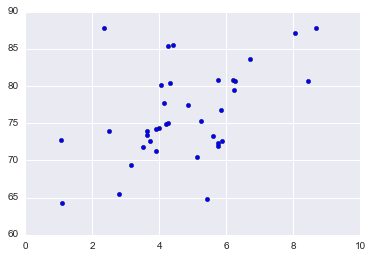

In [68]:
plt.scatter(np.abs(older_adults['A24']), older_adults['AGE'])

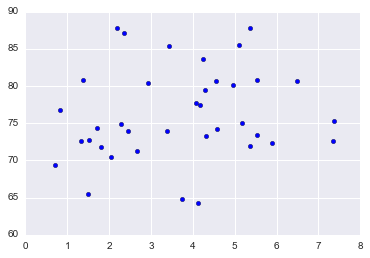

In [69]:
plt.scatter(np.abs(older_adults['B1']), older_adults['AGE'])

In [70]:
from scipy.stats import linregress

In [80]:
line = linregress(older_adults['AGE'], older_adults['A24'])
print(line)

LinregressResult(slope=-0.161449387783728, intercept=7.701175064646451, rvalue=-0.48528651777837989, pvalue=0.0023312781940471199, stderr=0.049169075882900405)


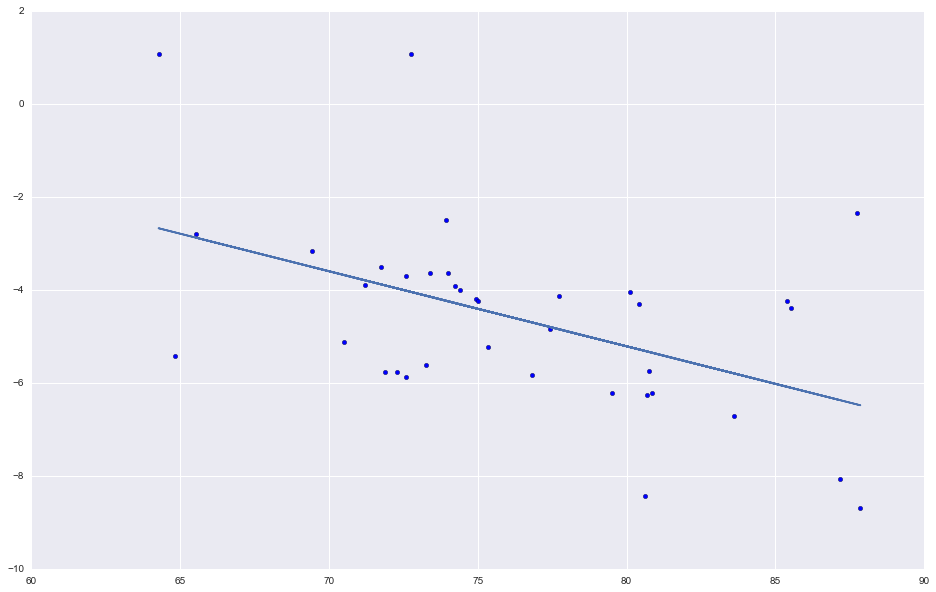

In [81]:
plt.figure(figsize=(16,10))
plt.scatter(older_adults['AGE'], older_adults['A24'])
plt.plot(older_adults['AGE'], older_adults['AGE'] * line.slope + line.intercept)

In [95]:
controls = df[df['CLASS'].isin(['MCI_Control', 'SA_Control'])]
X, y = getXy(controls)
lrange = np.linspace(0, 1, 100)
for i in lrange:
    rlasso = RandomizedLasso(alpha=i).fit(X, y)
    print(prettyprint(rlasso.scores_, cols, sort=True, n_coefs=3))

0.745 * A22	+	0.6 * A5	+	0.6 * A23
0.725 * A22	+	0.67 * B9	+	0.625 * A21
0.7 * A22	+	0.69 * B9	+	0.545 * A23
0.825 * A22	+	0.605 * B9	+	0.545 * A16
0.855 * A22	+	0.64 * B9	+	0.56 * A18
0.765 * A22	+	0.565 * A18	+	0.555 * B9
0.8 * A22	+	0.525 * B9	+	0.51 * A18
0.805 * A22	+	0.535 * A18	+	0.49 * B9
0.8 * A22	+	0.505 * A18	+	0.475 * B9
0.795 * A22	+	0.47 * A18	+	0.455 * B9
0.8 * A22	+	0.385 * A18	+	0.385 * B9
0.795 * A22	+	0.45 * A18	+	0.405 * A10
0.76 * A22	+	0.425 * A18	+	0.38 * B9
0.74 * A22	+	0.375 * A18	+	0.345 * A16
0.725 * A22	+	0.37 * A10	+	0.365 * A24
0.71 * A22	+	0.4 * A18	+	0.355 * A10
0.695 * A22	+	0.345 * A18	+	0.315 * A24
0.64 * A22	+	0.36 * A18	+	0.335 * A16
0.695 * A22	+	0.365 * A24	+	0.3 * A18
0.675 * A22	+	0.32 * A18	+	0.3 * A24
0.65 * A22	+	0.275 * A24	+	0.265 * A16
0.545 * A22	+	0.39 * A24	+	0.305 * A16
0.61 * A22	+	0.305 * A16	+	0.255 * A18
0.59 * A22	+	0.3 * A24	+	0.275 * A16
0.575 * A22	+	0.325 * A24	+	0.235 * A10
0.525 * A22	+	0.32 * A24	+	0.225 * A18
0.51 * A22	+	

In [83]:
line = linregress(controls['AGE'], controls['A22'])
print(line)

LinregressResult(slope=-0.15186368104790335, intercept=7.4862955043555122, rvalue=-0.53360493157172229, pvalue=0.003452590963044665, stderr=0.047204253824894966)


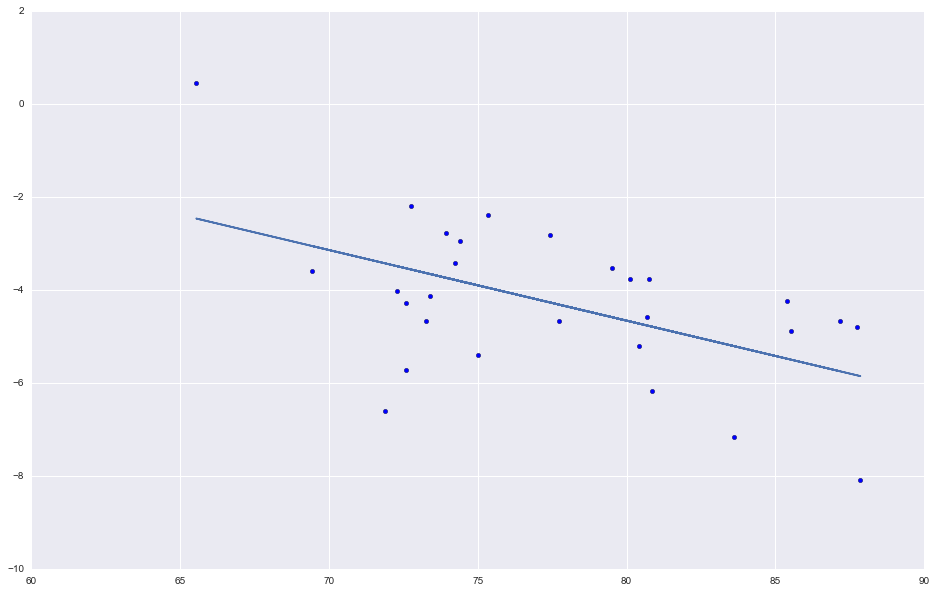

In [89]:
plt.figure(figsize=(16,10))
plt.scatter(controls['AGE'], controls['A22'])
plt.plot(controls['AGE'], controls['AGE'] * line.slope + line.intercept)

# dane, all controls

In [96]:
X, y = getXy(data)
lrange = np.linspace(0, 1, 100)
for i in lrange:
    rlasso = RandomizedLasso(alpha=i).fit(X, y)
    print(prettyprint(rlasso.scores_, cols, sort=True, n_coefs=3))

0.985 * B9	+	0.965 * B12	+	0.96 * B1
1.0 * B9	+	0.975 * B1	+	0.95 * A27
0.995 * B9	+	0.95 * B1	+	0.935 * B12
0.995 * B9	+	0.965 * B28	+	0.945 * B1
0.995 * B9	+	0.99 * B28	+	0.955 * B1
0.985 * B28	+	0.98 * B9	+	0.925 * B12
0.98 * B9	+	0.97 * B28	+	0.915 * B1
0.975 * B28	+	0.945 * B9	+	0.935 * B1
0.955 * B28	+	0.91 * B9	+	0.89 * B12
0.965 * B28	+	0.94 * B9	+	0.88 * B1
0.95 * B28	+	0.9 * B9	+	0.885 * B12
0.93 * B28	+	0.895 * B12	+	0.835 * B1
0.9 * B28	+	0.855 * B9	+	0.845 * B12
0.87 * B28	+	0.855 * B12	+	0.765 * B9
0.89 * B28	+	0.815 * B12	+	0.745 * B1
0.83 * B28	+	0.8 * B12	+	0.7 * B9
0.82 * B28	+	0.785 * B12	+	0.665 * B6
0.865 * B28	+	0.825 * B12	+	0.625 * B6
0.83 * B28	+	0.77 * B12	+	0.605 * B6
0.785 * B28	+	0.725 * B12	+	0.595 * B6
0.8 * B12	+	0.77 * B28	+	0.6 * B6
0.735 * B28	+	0.73 * B12	+	0.52 * B6
0.715 * B12	+	0.7 * B28	+	0.53 * B6
0.71 * B12	+	0.63 * B28	+	0.495 * B6
0.76 * B12	+	0.66 * B28	+	0.505 * B6
0.65 * B28	+	0.645 * B12	+	0.47 * B6
0.675 * B12	+	0.585 * B28	+	0.48 * A31


In [98]:
line = linregress(data['AGE'], data['B12'])
print(line)

LinregressResult(slope=-0.034293784918641719, intercept=-2.4614383033607994, rvalue=-0.38173246832057367, pvalue=0.0010206151016519274, stderr=0.0099961318382063898)


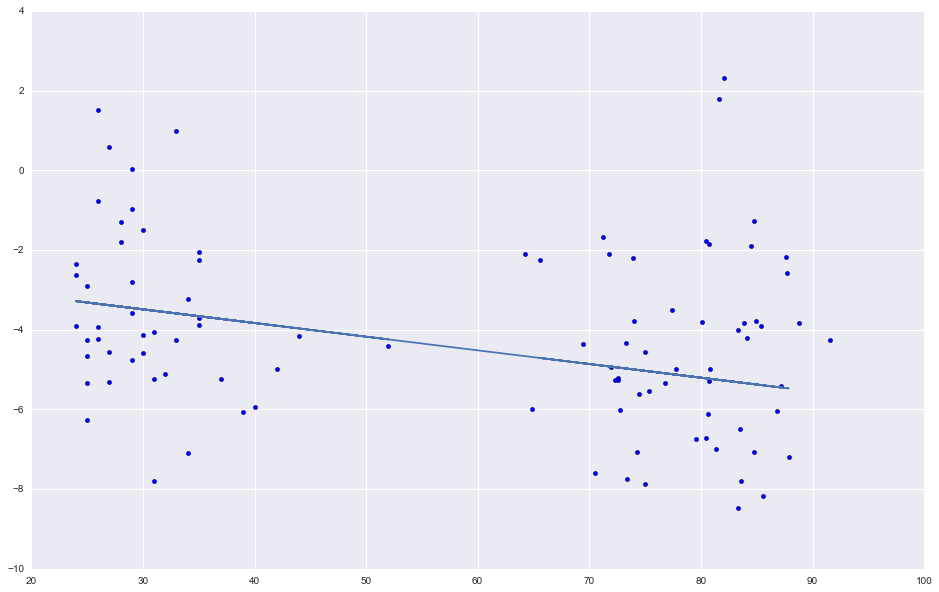

In [119]:
plt.figure(figsize=(16,10))
plt.scatter(df['AGE'], df['B12'])
plt.plot(data['AGE'], data['AGE'] * line.slope + line.intercept)

In [105]:
ttest_ind(young_adults['B12'], older_adults['B12'], equal_var=False)

Ttest_indResult(statistic=2.966194311346114, pvalue=0.0040046413724946139)

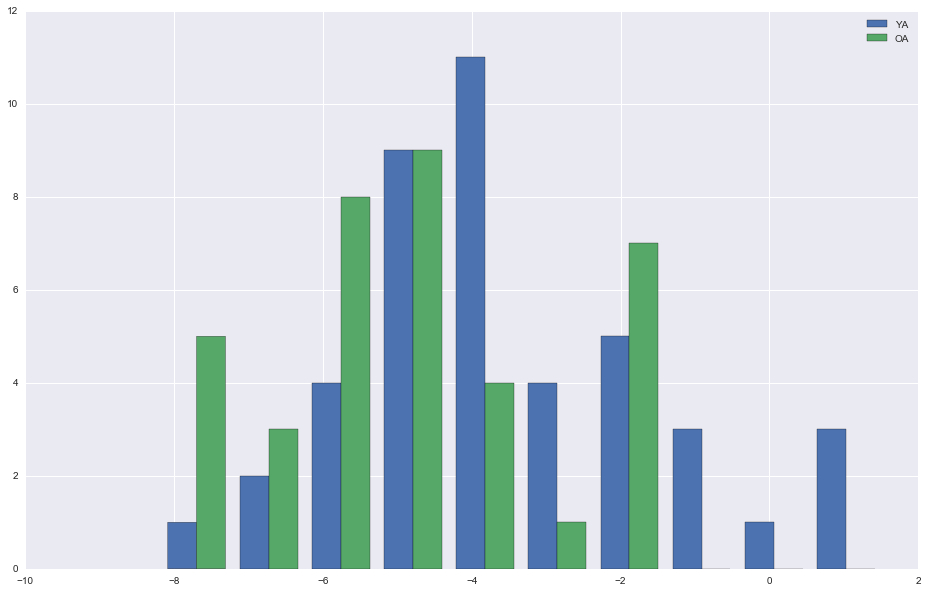

In [113]:
plt.figure(figsize=(16,10))
a, b, c = plt.hist([young_adults['B12'], older_adults['B12']], label=['YA', 'OA']); plt.legend()

In [110]:
young_adults.shape

(43, 63)

In [111]:
older_adults.shape

(37, 63)

In [114]:
df.head()

,SUBJECT,CLASS,AGE,SEX,AVG_PSD_SLOPE,A1,A2,A3,A4,A5,...,B26,B27,B28,B29,B30,FRONTAL,LTEMPORAL,CENTRAL,RTEMPORAL,OCCIPITAL
0,127101,SA_Control,80.84873,2.0,-5.804659,-6.207339,-6.006881,-5.004732,-6.249184,-7.848450,...,-4.748383,-5.950079,-6.606615,-5.917265,-4.766720,-6.458774,-6.633731,-7.051571,-6.169163,-5.433811
1,127102,MCI_Control,71.89870,1.0,-5.854608,-6.475066,-6.151471,-6.517301,-6.380120,-5.964319,...,-4.621796,-5.606016,-6.762557,-5.917265,-4.285510,-6.458774,-6.737865,-6.479462,-6.818404,-5.433811
2,127103,MCI_Control,69.43463,2.0,-2.606542,-2.343221,-2.556968,-2.007683,-0.922110,-2.570165,...,-0.981276,-2.358701,-3.011193,-2.159953,-1.578591,-0.696107,-4.134891,-4.065552,-3.002314,0.712028
3,127104,SA_Control,83.61396,2.0,-5.387849,-4.666144,-3.645240,-4.136069,-3.626828,-4.693491,...,-5.393366,-4.729700,-4.507910,-4.547847,-5.036724,-3.482842,-4.028538,-6.004186,-7.831297,-4.690516
4,127105,SA_Control,80.69541,2.0,-4.915307,-4.253528,-4.358633,-5.077860,-4.276687,-4.318121,...,-5.109961,-5.684171,-5.320151,-5.582867,-6.150030,-4.585814,-5.216128,-5.562051,-5.251369,-6.189279


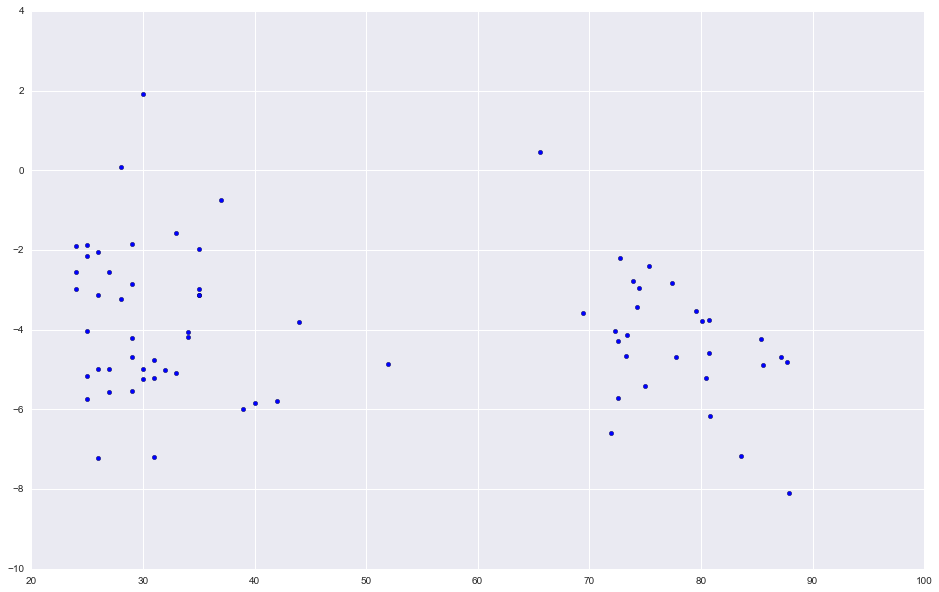

In [115]:
plt.figure(figsize=(16,10))
plt.scatter(data['AGE'], data['A22'])